<a href="https://colab.research.google.com/github/juniorcavicchioli/cp3-rede-neural-imagem/blob/main/cp_03_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quem é esse pokemon???

## Vamos começar...

Para começar, leia com atenção o link do dataset. É importante compreender de onde os dados estão vindo e como podemos utlizar. 

link: https://huggingface.co/datasets/keremberke/pokemon-classification

Neste link vocês vão encontrar instruções de como utilizar o dataset, vou usar carregar os dados e dar algumas informações adicionais para complementar e ajudar na compreensão de vocês. 

Os datos estão disponiveis no HuggingFace, todos os datasets deles estão disponibilizados por meio da biblioteca `datasets`.

Os dados estão disponiveis na seguinte estrutura: 

```python
Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 4869
})

```


In [ ]:
# Para utilizar o dataset do HuggingFace, primeiro vamos instalar a biblioteca `datasets`.

!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## carregando o dataset

from datasets import load_dataset

ds = load_dataset("keremberke/pokemon-classification", name="full")

## Separando os dados em treino, validação e teste

train_data = ds['train']
validation_data = ds['validation']
test_data = ds['test']

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Carregando o 
Dataset_Labels = ['Porygon', 'Goldeen', 'Hitmonlee', 'Hitmonchan', 'Gloom', 'Aerodactyl', 'Mankey', 'Seadra', 'Gengar', 'Venonat', 'Articuno', 'Seaking', 'Dugtrio', 'Machop', 'Jynx', 'Oddish', 'Dodrio', 'Dragonair', 'Weedle', 'Golduck', 'Flareon', 'Krabby', 'Parasect', 'Ninetales', 'Nidoqueen', 'Kabutops', 'Drowzee', 'Caterpie', 'Jigglypuff', 'Machamp', 'Clefairy', 'Kangaskhan', 'Dragonite', 'Weepinbell', 'Fearow', 'Bellsprout', 'Grimer', 'Nidorina', 'Staryu', 'Horsea', 'Electabuzz', 'Dratini', 'Machoke', 'Magnemite', 'Squirtle', 'Gyarados', 'Pidgeot', 'Bulbasaur', 'Nidoking', 'Golem', 'Dewgong', 'Moltres', 'Zapdos', 'Poliwrath', 'Vulpix', 'Beedrill', 'Charmander', 'Abra', 'Zubat', 'Golbat', 'Wigglytuff', 'Charizard', 'Slowpoke', 'Poliwag', 'Tentacruel', 'Rhyhorn', 'Onix', 'Butterfree', 'Exeggcute', 'Sandslash', 'Pinsir', 'Rattata', 'Growlithe', 'Haunter', 'Pidgey', 'Ditto', 'Farfetchd', 'Pikachu', 'Raticate', 'Wartortle', 'Vaporeon', 'Cloyster', 'Hypno', 'Arbok', 'Metapod', 'Tangela', 'Kingler', 'Exeggutor', 'Kadabra', 'Seel', 'Voltorb', 'Chansey', 'Venomoth', 'Ponyta', 'Vileplume', 'Koffing', 'Blastoise', 'Tentacool', 'Lickitung', 'Paras', 'Clefable', 'Cubone', 'Marowak', 'Nidorino', 'Jolteon', 'Muk', 'Magikarp', 'Slowbro', 'Tauros', 'Kabuto', 'Spearow', 'Sandshrew', 'Eevee', 'Kakuna', 'Omastar', 'Ekans', 'Geodude', 'Magmar', 'Snorlax', 'Meowth', 'Pidgeotto', 'Venusaur', 'Persian', 'Rhydon', 'Starmie', 'Charmeleon', 'Lapras', 'Alakazam', 'Graveler', 'Psyduck', 'Rapidash', 'Doduo', 'Magneton', 'Arcanine', 'Electrode', 'Omanyte', 'Poliwhirl', 'Mew', 'Alolan Sandslash', 'Mewtwo', 'Weezing', 'Gastly', 'Victreebel', 'Ivysaur', 'MrMime', 'Shellder', 'Scyther', 'Diglett', 'Primeape', 'Raichu']


{'image_file_path': '/root/.cache/huggingface/datasets/downloads/extracted/2dfab437edd591e4500446e3b5b3108b0eb62671435f4d3f18fd7618ab2e8dc4/Alakazam/909d9e0aa3264423b8010a81ae230a74_jpg.rf.47dab6b88c91abe11ddf838e6d19be47.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F5E5D426740>, 'labels': 127}


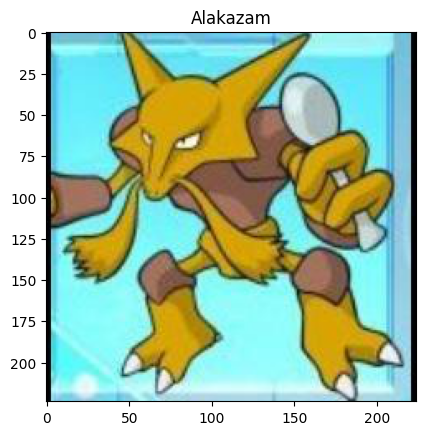

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Seleciona um exemplo do conjunto de treinamento
example = train_data[100]
print(example)

img = example['image']
#print(np.array(img).shape)

# Mostra a imagem e seu tipo (classe)
plt.imshow(img)
plt.title(Dataset_Labels[example['labels']])
plt.show()



## Agora é com você! 

Faça o desenvolvimento do seu projeto de forma coerente e apresente os resultados. 

Utilize o material disponibilizado em aula, mas não se limite apenas a ele, busque por tutoriais e outros projetos semelhantes que possam contribuir para desenvolvimento. 

## R1 - Carregamento e compreensão do dataset
Familiarize-se com o conjunto de dados, verificando a quantidade de imagens, a resolução das imagens, a distribuição das classes e outras características relevantes.

Colunas:

- `image_file_path (string)`: O caminho para o arquivo de imagem no disco.
- `image (image)`: A própria imagem.
- `labels (class label)`: A etiqueta de classe representando o pokemon.

| Coluna | Tipo | Dados faltantes | Descrição |
|-|-|-|-|
| image_file_path | object | Não | O caminho para o arquivo de imagem no disco |
| image | object | Não | A própria imagem |
| labels | int64 | Não |  A etiqueta de classe representando o pokemon |


Sobre os dados:
- 110 valores na coluna labels (suponho que equivale a 110 pokemons);
- 4869 linhas, da 0 à 4868;
- Cada linha contém uma imagem única, totalizando o mesmo valor de linhas sendo imagens (4869)
- Todas as imagens tem a mesma resolução.

### Convertendo o dataset para o tipo pandas
Já que é o tipo que sei mexer

In [ ]:
type(train_data)

datasets.arrow_dataset.Dataset

In [ ]:
import pandas as pd
#convertendo o tipo do dataset de treino para um dataset do pandas
train_data_df = train_data.to_pandas()
validation_data_df = validation_data.to_pandas()
test_data_df = test_data.to_pandas()

In [ ]:
test_data_df

,image_file_path,image,labels
0,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",127
1,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",127
2,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",127
3,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",127
4,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",127
...,...,...,...
727,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",85
728,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",85
729,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",85
730,/root/.cache/huggingface/datasets/downloads/ex...,"{'bytes': None, 'path': '/root/.cache/huggingf...",85


### Informações básicas sobre o train_data

In [ ]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_file_path  4869 non-null   object
 1   image            4869 non-null   object
 2   labels           4869 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 114.2+ KB


In [ ]:
labels_counts = train_data_df['labels'].value_counts().reset_index()
labels_counts.columns = ['class', 'count']
labels_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   110 non-null    int64
 1   count   110 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [ ]:
labels_counts

,class,count
0,102,65
1,77,59
2,41,58
3,6,55
4,39,54
...,...,...
105,131,35
106,58,15
107,136,14
108,52,14


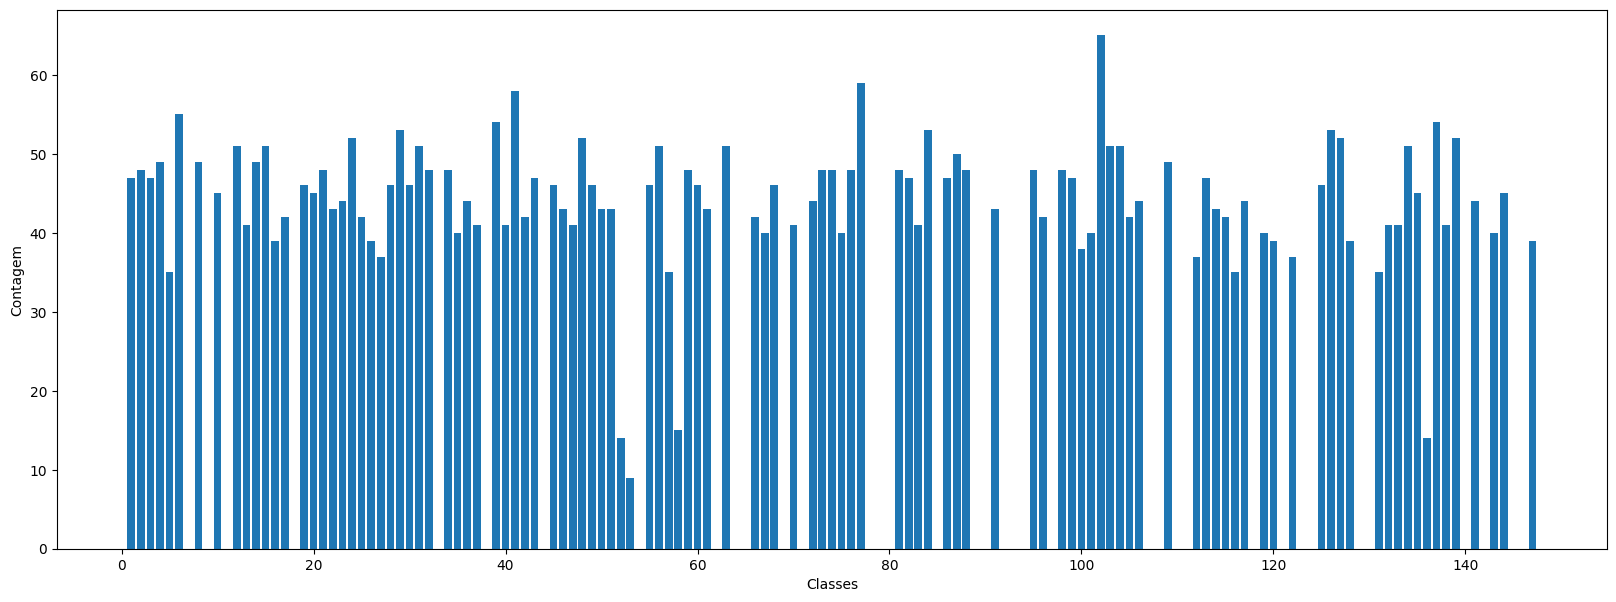

In [ ]:
plt.figure(figsize=(20, 7))

plt.bar(labels_counts['class'], labels_counts['count'])

# Adicione rótulos nos eixos
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Mostre o gráfico
plt.show()

In [ ]:
image_counts = train_data_df['image'].value_counts()
image_counts.info()

<class 'pandas.core.series.Series'>
Index: 4869 entries, {'bytes': None, 'path': '/root/.cache/huggingface/datasets/downloads/extracted/2dfab437edd591e4500446e3b5b3108b0eb62671435f4d3f18fd7618ab2e8dc4/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg'} to {'bytes': None, 'path': '/root/.cache/huggingface/datasets/downloads/extracted/2dfab437edd591e4500446e3b5b3108b0eb62671435f4d3f18fd7618ab2e8dc4/Zubat/fccfe4de71a543349378b09d91d3f745_jpg.rf.54caf37886492b83ba401552d5b2201a.jpg'}
Series name: image
Non-Null Count  Dtype
--------------  -----
4869 non-null   int64
dtypes: int64(1)
memory usage: 76.1+ KB


In [ ]:
image_file_path_counts = train_data_df['image_file_path'].value_counts()
image_file_path_counts.info()

<class 'pandas.core.series.Series'>
Index: 4869 entries, /root/.cache/huggingface/datasets/downloads/extracted/2dfab437edd591e4500446e3b5b3108b0eb62671435f4d3f18fd7618ab2e8dc4/Abra/0282b2f3a22745f1a436054ea15a0ae5_jpg.rf.8672478a3b97f7c0c5b6737c3fd2d3d8.jpg to /root/.cache/huggingface/datasets/downloads/extracted/2dfab437edd591e4500446e3b5b3108b0eb62671435f4d3f18fd7618ab2e8dc4/Zubat/fccfe4de71a543349378b09d91d3f745_jpg.rf.54caf37886492b83ba401552d5b2201a.jpg
Series name: image_file_path
Non-Null Count  Dtype
--------------  -----
4869 non-null   int64
dtypes: int64(1)
memory usage: 76.1+ KB


### Verificação de se todas as imagens tem a mesma resolução

Peguei a resolução de uma das imagens usando esse código.

Image shape: (224, 224)


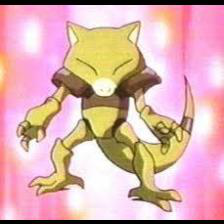

In [ ]:
from PIL import Image # importando o módulo Image da biblioteca Python Imaging Library (PIL) para trabalhar com a imagem.

# guarda o path da imagem
img_path = train_data_df['image_file_path'][0]
# Abre a imagem
img = Image.open(img_path)
# Pega as dimensões
width, height = img.size
print(f"Image shape: ({width}, {height})")
img

Aqui estão duas funções:
- `check_resolution`: retorna 0 se a resolução bater com a resolução da primeira imagem acima (224) e 1 se for diferente.
- `check_resolution_uniformity`: verifica se a quantidade de imagens que bateu com a resolução da imagem acima (224) equivale ao total de linhas no dataset.

Se o print no final for True é porque todas as imagens estão na mesma resolução.

In [ ]:
def check_resolution(resolution):
  if resolution[0] != 224 != resolution[1]:
    return 1
  return 0

def check_resolution_uniformity(df):
    resolution = []
    for i in range(df.shape[0]):
        img_path = df['image_file_path'][i]
        img = Image.open(img_path)
        resolution.append(check_resolution(img.size))
    resolucao_df = pd.DataFrame({'resolucao_diferente': resolution})
    if resolucao_df.value_counts().values[0] == df.shape[0]:
      return True
    return False


In [ ]:
print(check_resolution_uniformity(train_data_df))

True


## R2: Preparação de Dados


In [ ]:
batch_size = 32
image_size = (224, 224)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Cria o gerador de dados de imagem
datagen = ImageDataGenerator(
    rescale=1./255, # Normaliza os valores de pixel
    rotation_range=10, # Aplica rotações aleatórias nas imagens
    width_shift_range=0.1, # Aplica translações horizontais aleatórias nas imagens
    height_shift_range=0.1, # Aplica translações verticais aleatórias nas imagens
    horizontal_flip=True # Inverte aleatoriamente as imagens horizontalmente
)

# Gera os batches de dados de treinamento
batch_size = 32
generator = datagen.flow(
    X, y,
    batch_size=batch_size
)


NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definindo o tamanho das imagens
img_height = 224
img_width = 224

# Criando o gerador de imagens para o conjunto de treino
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data_df,
    x_col="image_file_path",
    y_col="label",
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    class_mode='binary'
)

# Criando o gerador de imagens para o conjunto de validação
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=validation_data_df,
    x_col="image_file_path",
    y_col="label",
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

# Criando o gerador de imagens para o conjunto de teste
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data_df,
    x_col="image_file_path",
    y_col="label",
    target_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

# Definindo a arquitetura do modelo
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Avaliando o modelo no conjunto de testes
loss, accuracy = model.evaluate(test_generator)
print("Test accuracy:", accuracy)


KeyError: ignored

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Cria o base_model referente a MobileNet V2, sem a camada de classificação
base_model = MobileNetV2(input_shape=(224, 224, 3), # não precisa especificar pois já é o valor padrão
                        include_top=False,
                        weights='imagenet')

In [ ]:
base_model.summary()

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
#Camada  para gerar um vetor de 1280 elementos 
global_average_layer = layers.GlobalAveragePooling2D()

# O Classificador para gato cachorro com 1 neuronio 
saida_layer = layers.Dense(1, activation='sigmoid')

In [ ]:
model = tf.keras.Sequential([
  base_model,   #### cnn mobilenet
  global_average_layer, ###flatten
  saida_layer ### especiallista
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
validation_steps=20

loss0,accuracy0 = model.evaluate(train_generator, steps = validation_steps)